In [1]:
# Modules
import numpy as np
import xarray as xr
import pandas as pd

from data import data_loader
from data import gesla_preprocessing
from data import era5_preprocessing
from data import preprocessing

In [2]:
# ---
# Preprocessing
# ---

# Get timeseries of predictor and predictand
percentile = 0.95
predictor = "sp"
season = "autumn"
x1, y1, t1 = preprocessing.preprocessing1(season, predictor, percentile)

Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: autumn
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA


Import Modules

Description 

Model: Random Forest
Predictand: Classification (0,1)
Percentile Predictand: 0.95
Predictors: sp 
Seaon: winter
Preprocessing / Region: preprocessing1, only one station selected
Start Preprocessing of Data


Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA
Start model training

Evaluate Model 

test_score: 0.8982300884955752
train_score: 0.9556868537666174
importances: [0.00000000e+00 1.72891519e-04 2.81572627e-20 ... 4.34961487e-04
 0.00000000e+00 0.00000000e+00]
saved importances to : results/random_forest/rf001/importances_sp
Show Confusion Matrix 



d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf001.py:109: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf001.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved cf matrix to : results/random_forest/rf001/cf_matrix_sp.jpg
Show AUROC 

AUC: 0.8767722737615964
saved AUROC to : results/random_forest/rf001/AUROC_sp.jpg
End of Model run


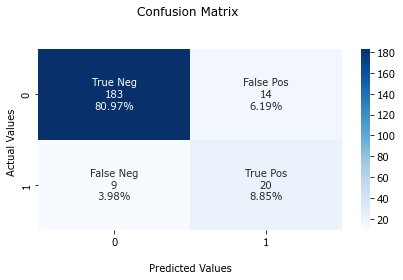

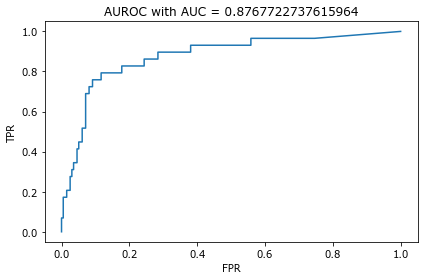

In [3]:
#---
# Model-Architecture
# Maybe choose different predictors within same model architecture?
#---
from models.random_forest import rf001

predictors = ["sp", "tp", "u10", "v10",]
percentiles = [0.95, 0.99]

for percentile in percentiles[:1]:
    rf001.run(predictor="sp", percentile=percentile)

In [4]:
# Forecast


In [ ]:
# Postprocessing

In [ ]:
# Diagnostics

In [ ]:
# Visualization